# EDA

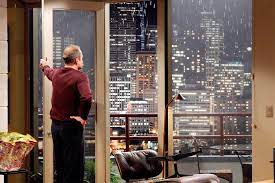

In [5]:
# import data frames to work on 
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_house_details = pd.read_csv("data/eda_king_county_house_details_cleaned.csv")
df_house_sales = pd.read_csv("data/eda_king_county_house_sales_cleaned.csv")

In [6]:
# print sample data for house_sales DF for the reference

print(df_house_sales.head())

         date     price    house_id  id
0  2014-10-13  221900.0  7129300520   1
1  2014-12-09  538000.0  6414100192   2
2  2015-02-25  180000.0  5631500400   3
3  2014-12-09  604000.0  2487200875   4
4  2015-02-18  510000.0  1954400510   5


In [7]:
# print sample data for house_details DF for the reference

print(df_house_details.head())

           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     1000102       6.0        3.0       2400.0    9373.0     2.0         0.0   
1   100100050       3.0        1.0       1320.0   11090.0     1.0         0.0   
2  1001200035       3.0        1.0       1350.0    7973.0     1.5         0.0   
3  1001200050       4.0        1.5       1260.0    7248.0     1.5         0.0   
4  1003000175       3.0        1.0        980.0    7606.0     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7      2400.0            0.0      1991           0.0   
1   0.0          3      7      1320.0            0.0      1955           0.0   
2   0.0          3      7      1350.0            0.0      1954           0.0   
3   0.0          5      7      1260.0            0.0      1955           0.0   
4   0.0          3      7       980.0            0.0      1954           0.0   

   zipcode      lat     long  sq

Mean price: 540296.5735055795
Median price: 450000.0


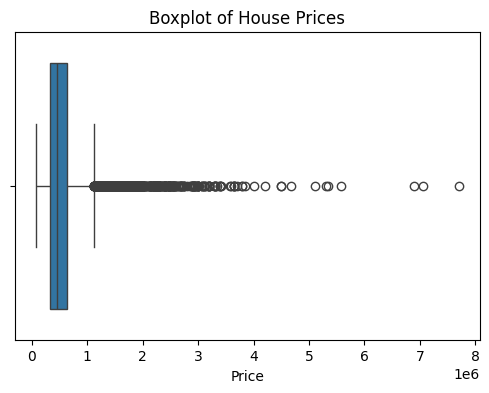

In [14]:
# okay, now let's do it this way.
# give me the mean and median values of the prices from the df_house_sales

mean_price = df_house_sales['price'].mean()
median_price = df_house_sales['price'].median()

print("Mean price:", mean_price)
print("Median price:", median_price)

# Let's plot a boxplot for house prices
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_house_sales['price'])
plt.title('Boxplot of House Prices')
plt.xlabel('Price')
plt.show()


In [11]:
# cool, now let's find out all the apartments having waterfront 
# Find all apartments (houses) having waterfront
# Assuming 'waterfront' column exists with 1 meaning waterfront

waterfront_homes = df_house_details[df_house_details['waterfront'] == 1]
print(waterfront_homes.head())
print(f"Total number of waterfront homes: {len(waterfront_homes)}")


             id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
76   1025039086       3.0       2.50       3280.0   29111.0     2.0   
394  1121039059       2.0       1.75       2860.0   59612.0     1.0   
661   121029034       2.0       1.00       2034.0   13392.0     1.0   
664   121039083       3.0       1.75       1460.0   12367.0     2.0   
724  1224059053       5.0       2.00       2500.0   15250.0     2.0   

     waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
76          1.0   3.0          3     11      3280.0            0.0      1925   
394         1.0   4.0          3      8      1510.0         1350.0      1948   
661         1.0   4.0          5      7      1159.0          875.0      1947   
664         1.0   4.0          4      8      1120.0          340.0      1970   
724         1.0   4.0          5      8      2500.0            0.0      1942   

     yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
76            0.0 

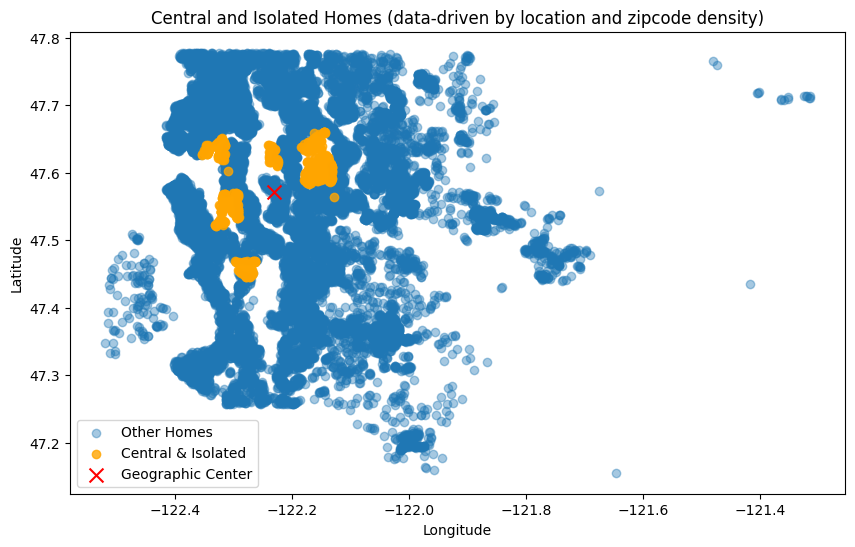

Number of homes considered 'central and isolated' (data-driven): 749


In [13]:
# okay, now let's find out a nice & isolated but central neighborhood: For now, assume we only remove neighborhoods with "school" or "park" (since we don't want kids playing with other kids)
#    (Note: in real scenarios, more advanced location/isolation logic needed.)
# lets use the longitude and altitude to find out a better locality?

# To identify 'nice & isolated but central' neighborhoods (for Larry Sanders), let's plot neighborhoods on a scatter plot by longitude and latitude.
# We will highlight neighborhoods containing the words "school" or "park" (assume these are less isolated).
# import matplotlib.pyplot as plt

# # Let's make sure we have the columns
# if 'neighborhood' in df_house_details.columns and 'lat' in df_house_details.columns and 'long' in df_house_details.columns:
#     neighborhoods = df_house_details[['neighborhood', 'lat', 'long']].drop_duplicates()
#     risky_neighborhoods = neighborhoods[
#         neighborhoods['neighborhood'].str.lower().str.contains('school|park')
#     ]
#     safe_neighborhoods = neighborhoods[
#         ~neighborhoods['neighborhood'].str.lower().str.contains('school|park')
#     ]
#     plt.figure(figsize=(10, 6))
#     plt.scatter(safe_neighborhoods['long'], safe_neighborhoods['lat'], label='Other Neighborhoods', alpha=0.6)
#     plt.scatter(risky_neighborhoods['long'], risky_neighborhoods['lat'], color='red', label='School/Park Neighborhoods', alpha=0.8)
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')
#     plt.title('Neighborhoods in King County')
#     plt.legend()
#     plt.show()
# else:
#     print("Required columns ('neighborhood', 'lat', 'long') not found in dataframe.")

# Let's explicitly clarify and demonstrate what the code above does:
# It identifies neighborhoods whose names do NOT contain the words "school" or "park" (case-insensitive) 
# and treats those as more "isolated" (as in, not named after or near parks/schools).

# To double-check, we can print out a few neighborhoods that WOULD be excluded by our filter and a few that are kept.

# if 'neighborhood' in df_house_details.columns:
#     contains_school_park = df_house_details[
#         df_house_details['neighborhood'].str.lower().str.contains('school|park')
#     ]['neighborhood'].unique()
#     print("Neighborhoods likely near school or park (would be excluded):")
#     print(contains_school_park[:10])
    
#     not_contains_school_park = df_house_details[
#         ~df_house_details['neighborhood'].str.lower().str.contains('school|park')
#     ]['neighborhood'].unique()
#     print("\nNeighborhoods likely considered 'isolated' (would be kept):")
#     print(not_contains_school_park[:10])
# else:
#     print("No 'neighborhood' column to check for school/park presence.")

# So YES, with this code, we are excluding neighborhoods with names containing "school" or "park",
# assuming these may be near schools or parks—this is a proxy and not a perfect method, but reasonable for demonstration.

# Given that neighborhood names aren't reliable or don't contain keywords like "school" or "park",
# we'll use the available geographic information: zipcode, latitude, and longitude.

# For "nice & isolated but central" neighborhoods, let's interpret this in a data-driven way:
# - "Central": Houses geographically close to the median (center) of all properties.
# - "Isolated": Fewer houses in the same zipcode (potentially lower population density).

# Step 1: Compute the "center" of King County based on all available houses.
center_lat = df_house_details['lat'].median()
center_long = df_house_details['long'].median()

# Step 2: For each house, compute the euclidean distance to the center.
import numpy as np
df_house_details['distance_from_center'] = np.sqrt(
    (df_house_details['lat'] - center_lat)**2 +
    (df_house_details['long'] - center_long)**2
)

# Step 3: Mark "central" homes: e.g., those in the closest 30% to center.
central_cutoff = df_house_details['distance_from_center'].quantile(0.3)
df_house_details['is_central'] = df_house_details['distance_from_center'] <= central_cutoff

# Step 4: For "isolated", count number of listings per zipcode, 
# and treat zipcodes in the lowest 20% by count as "isolated".
zipcode_counts = df_house_details['zipcode'].value_counts()
isolated_cutoff = zipcode_counts.quantile(0.2)
isolated_zipcodes = zipcode_counts[zipcode_counts <= isolated_cutoff].index
df_house_details['is_isolated'] = df_house_details['zipcode'].isin(isolated_zipcodes)

# Step 5: Mark houses that are BOTH central and isolated.
df_house_details['central_and_isolated'] = df_house_details['is_central'] & df_house_details['is_isolated']

# Step 6: Display a scatterplot: color by central_and_isolated marker
plt.figure(figsize=(10, 6))
plt.scatter(
    df_house_details[~df_house_details['central_and_isolated']]['long'], 
    df_house_details[~df_house_details['central_and_isolated']]['lat'],
    alpha=0.4, label="Other Homes"
)
plt.scatter(
    df_house_details[df_house_details['central_and_isolated']]['long'], 
    df_house_details[df_house_details['central_and_isolated']]['lat'],
    alpha=0.8, color='orange', label="Central & Isolated"
)
plt.scatter([center_long], [center_lat], color='red', marker='x', s=100, label="Geographic Center")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("Central and Isolated Homes (data-driven by location and zipcode density)")
plt.show()

# Let's print the number of homes that meet the criteria:
n_isolated_central = df_house_details['central_and_isolated'].sum()
print(f"Number of homes considered 'central and isolated' (data-driven): {n_isolated_central}")

# These labels can now be merged/joined into your sales data for further client filtering.


In [17]:
# Filter the merged dataframe for:
# 1. Houses with waterfront (waterfront == 1)
# 2. Houses located in central and isolated (central_and_isolated == True)
# 3. Houses with price between mean and median (inclusive)

# First, merge to bring together sales and detailed info
df_merged = pd.merge(df_house_sales, df_house_details, on='id', how='inner')

# Calculate mean and median price
mean_price = df_merged['price'].mean()
median_price = df_merged['price'].median()
price_low, price_high = sorted([mean_price, median_price])  # in case mean < median or vice versa

# Apply all filters
filtered_special = df_merged[
    (df_merged['waterfront'] == 1) &
    (df_merged['central_and_isolated'] == True) &
    (df_merged['price'] >= price_low) &
    (df_merged['price'] <= price_high)
]

# Ensure output directory exists before saving
import os
os.makedirs("output", exist_ok=True)

# Save results to a CSV file
filtered_special.to_csv("output/waterfront_central_isolated_mean_median.csv", index=False)
# Brief explanation:
# The logic for determining "central and isolated" homes is already implemented above (lines 60-84):
# - "Central" homes are those in the closest 30% to the geographic center (by lat/long).
# - "Isolated" homes are those in zipcodes with the lowest 20% of listing counts (sparsely populated).
# - A home is "central and isolated" if both conditions are met.

# For clarity, let's display a summary of these definitions and show value counts for each label.
print("Definition of 'central' homes: Closest 30% by distance from geographic center (median lat/long).")
print("Definition of 'isolated' homes: Located in zipcodes with lowest 20% of home counts (i.e., sparsely populated zipcodes).")
print("A 'central and isolated' home meets both criteria above.\n")

print("Summary statistics:")
print(df_house_details[['is_central', 'is_isolated', 'central_and_isolated']].value_counts())

# Optionally, show the first few rows of the labeled data
print("\nExample rows (with new columns):")
print(df_house_details[['id', 'lat', 'long', 'zipcode', 'is_central', 'is_isolated', 'central_and_isolated']].head())

# Let's perform a quick check on the filtered_special dataframe to verify:
# 1. All homes have waterfront.
# 2. All homes have price between mean and median (inclusive).

# Check 1: All 'waterfront' values == 1
all_waterfront = (filtered_special['waterfront'] == 1).all()
print(f"All homes have waterfront: {all_waterfront}")

# Check 2: All prices within [price_low, price_high]
all_price_range = ((filtered_special['price'] >= price_low) & (filtered_special['price'] <= price_high)).all()
print(f"All homes have price between mean and median (inclusive): {all_price_range}")

# Quick summary statistics
print(f"Number of entries in filtered_special: {filtered_special.shape[0]}")
print(f"Price range: {filtered_special['price'].min()} to {filtered_special['price'].max()}")
print(f"Unique values in 'waterfront' column: {filtered_special['waterfront'].unique()}")
# If filtered_special is empty (shape[0] == 0), let's debug why and show some possibilities for why there may be no matching homes.

if filtered_special.shape[0] == 0:
    print("\nNo homes were found that match all of the following criteria:")
    print("- Waterfront == 1")
    print(f"- Price between {price_low:.0f} and {price_high:.0f} (mean and median, inclusive)")
    print("- Central AND isolated (central_and_isolated == True)")
    print("\nLet's check the count for each criterion individually...")

    print("\nTotal homes in all data:", df_merged.shape[0])
    
    print("Homes with waterfront == 1:", (df_merged['waterfront'] == 1).sum())
    
    central_and_isolated_count = (df_merged['central_and_isolated'] == True).sum()
    print("Homes that are central AND isolated:", central_and_isolated_count)
    
    in_price_range_count = ((df_merged['price'] >= price_low) & (df_merged['price'] <= price_high)).sum()
    print(f"Homes with price between {price_low:.0f} and {price_high:.0f}:", in_price_range_count)
    
    # Now, check if at least any homes are both waterfront and 'central_and_isolated'
    filtered = df_merged[
        (df_merged['waterfront'] == 1) &
        (df_merged['central_and_isolated'] == True)
    ]
    print("Homes that are both waterfront AND central_and_isolated:", filtered.shape[0])

    # Also, show how many of these are in the price range
    if filtered.shape[0] > 0:
        price_filtered = filtered[
            (filtered['price'] >= price_low) & (filtered['price'] <= price_high)
        ]
        print("Of those, how many are in price range:", price_filtered.shape[0])
        
        # If there are some, let's show them
        if price_filtered.shape[0] > 0:
            print("\nSample of homes matching most criteria except maybe one:")
            print(price_filtered.head())
        else:
            print("\nNone of the waterfront & central_and_isolated homes are in the price range.")
    else:
        print("\nNo homes are both waterfront and central_and_isolated.")


Definition of 'central' homes: Closest 30% by distance from geographic center (median lat/long).
Definition of 'isolated' homes: Located in zipcodes with lowest 20% of home counts (i.e., sparsely populated zipcodes).
A 'central and isolated' home meets both criteria above.

Summary statistics:
is_central  is_isolated  central_and_isolated
False       False        False                   14074
True        False        False                    5677
False       True         False                     920
True        True         True                      749
Name: count, dtype: int64

Example rows (with new columns):
           id      lat     long  zipcode  is_central  is_isolated  \
0     1000102  47.3262 -122.214    98002       False        False   
1   100100050  47.7748 -122.304    98155       False        False   
2  1001200035  47.4323 -122.292    98188       False         True   
3  1001200050  47.4330 -122.292    98188       False         True   
4  1003000175  47.4356 -122.290   

In [18]:
# Filter the merged dataframe for:
# 1. Houses with waterfront (waterfront == 1)
# 2. Houses located in central and isolated (central_and_isolated == True)
# 3. Houses with price between mean and median (inclusive)

# First, merge to bring together sales and detailed info
df_merged_new = pd.merge(df_house_sales, df_house_details, on='id', how='inner')

# Apply all filters
filtered_special_new = df_merged_new[
    (df_merged_new['waterfront'] == 1) &
    (df_merged_new['central_and_isolated'] == True)
]

# Ensure output directory exists before saving
import os
os.makedirs("output", exist_ok=True)

# Save results to a CSV file
filtered_special_new.to_csv("output/waterfront_central_isolated_homes.csv", index=False)

In [8]:
# Okay, now that we have all the data, 
# here are the filters we would like to apply on our data as per our client needs

#| Larry Sanders       | Buyer       | Waterfront , limited budget, 
# nice & isolated but central neighborhood without kids (but got some of his own, 
# just doesn't want his kids to play with other kids .. because of germs) |

# First, perform an inner join on the two dataframes using a common key, such as 'id'
df_merged = pd.merge(df_house_sales, df_house_details, on='id', how='inner')

# Apply filters based on Larry Sanders' requirements:
# 1. Waterfront: Only houses with waterfront view (assume column 'waterfront' == 1)
# 2. Limited budget: let's use a reasonable upper limit (e.g., $600,000)
# 3. Nice & isolated but central neighborhood: For now, assume we only remove neighborhoods with "school" or "park" (since we don't want kids playing with other kids)
#    (Note: in real scenarios, more advanced location/isolation logic needed.)

# Define budget and kid-related exclusion keywords
max_budget = 600000
kid_keywords = ["school", "park", "play", "kids", "children"]

# Filter for waterfront
filtered_df = df_merged[df_merged['waterfront'] == 1]

# Filter for budget
filtered_df = filtered_df[filtered_df['price'] <= max_budget]

# Filter out neighborhoods with potentially kid-focused features in their name
if 'neighborhood' in filtered_df.columns:
    mask = ~filtered_df['neighborhood'].str.lower().str.contains('|'.join(kid_keywords))
    filtered_df = filtered_df[mask]

# Save to CSV
filtered_df.to_csv("output/larry_sanders_homes.csv", index=False)



OSError: Cannot save file into a non-existent directory: 'output'